### 결정 트리 실습 - Human Activity Recognition

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('datasets\\human_activity\\train.csv')
test = pd.read_csv('datasets\\human_activity\\test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [7]:
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [8]:
train['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [9]:
train.isna().values.sum()

0

In [10]:
test.isna().values.sum()

0

In [11]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

In [12]:
X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

In [13]:
X_train.shape

(7352, 561)

In [14]:
X_test.shape

(2947, 561)

* t-SNE 시각화

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = ####

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 1.093s...
[t-SNE] Computed neighbors for 7352 samples in 37.586s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.095253
[t-SNE] KL divergence after 1000 iterations: 1.366782


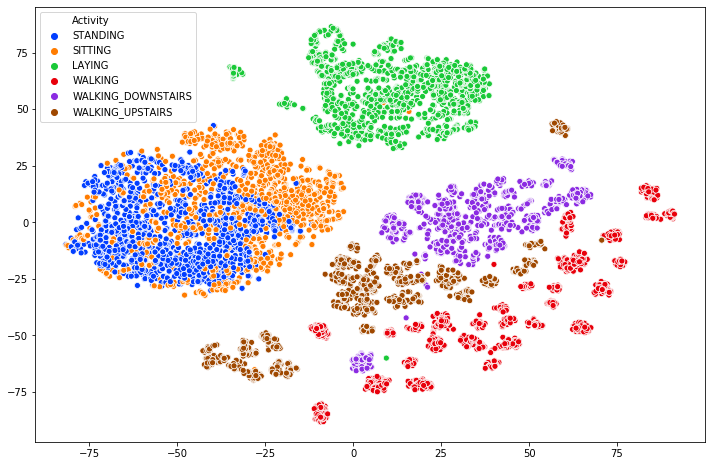

In [18]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

* t_SNE의 하이퍼 파리미터 perplexity : 보통 데이터셋이 클 경우 perplexity 값도 커야함. 기본값은 30이고 보통 5~50 사이의 값을 지정

In [ ]:
#perplexity=50 으로 테스트
####

* Logistic Regression  + hyperparameter tuning + cross validation

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

parameters = {'C':np.arange(10,100,10), 'penalty':['l2','l1']}

lr_clf = LogisticRegression()
lr_clf_rs = RandomizedSearchCV(lr_clf, param_distributions=parameters, cv=5,random_state = 42, verbose=2)
lr_clf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l2, C=10 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. penalty=l2, C=10, total=   1.2s
[CV] penalty=l2, C=10 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ................................. penalty=l2, C=10, total=   1.3s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   1.3s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   1.3s
[CV] penalty=l2, C=10 ................................................
[CV] ................................. penalty=l2, C=10, total=   1.3s
[CV] penalty=l1, C=10 ................................................
[CV] ................................. penalty=l1, C=10, total=   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ................................. penalty=l1, C=10, total=   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ................................. penalty=l1, C=10, total=   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring

In [17]:
print("Best Estimator : ", lr_clf_rs.best_estimator_)
print("Best Parameters : ", lr_clf_rs.best_params_)
print("Best Score : ", lr_clf_rs.best_score_)

Best Estimator :  LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best Parameters :  {'penalty': 'l2', 'C': 50}
Best Score :  0.9332216040733086


In [20]:
y_pred = lr_clf_rs.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9569053274516457

* confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[537,   0,   0,   0,   0,   0],
       [  0, 427,  62,   0,   0,   2],
       [  0,  11, 521,   0,   0,   0],
       [  0,   0,   0, 492,   2,   2],
       [  0,   0,   0,   6, 403,  11],
       [  0,   0,   0,  26,   5, 440]], dtype=int64)

* Decision Tree  + hyperparameter tuning + cross validation

In [23]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':np.arange(2,10,2)}

dt_clf = DecisionTreeClassifier()
dt_clf_rs = RandomizedSearchCV(dt_clf, param_distributions=parameters, random_state = 42, verbose=2)
dt_clf_rs.fit(X_train, y_train)
y_pred = dt_clf_rs.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.7s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   1.3s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   1.3s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=   1.3s
[CV] max_depth=4 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   31.1s finished


In [24]:
print("Best Estimator : ", dt_clf_rs.best_estimator_)
print("Best Parameters : ", dt_clf_rs.best_params_)
print("Best Score : ", dt_clf_rs.best_score_)

Best Estimator :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Parameters :  {'max_depth': 8}
Best Score :  0.8531111696888136


In [25]:
y_pred = dt_clf_rs.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8724126230064473

In [28]:
confusion_matrix(y_test, y_pred)

array([[537,   0,   0,   0,   0,   0],
       [  0, 371, 120,   0,   0,   0],
       [  0,  57, 475,   0,   0,   0],
       [  0,   0,   0, 469,  17,  10],
       [  0,   0,   0,  13, 352,  55],
       [  0,   0,   0,  73,  31, 367]], dtype=int64)

* feature importace

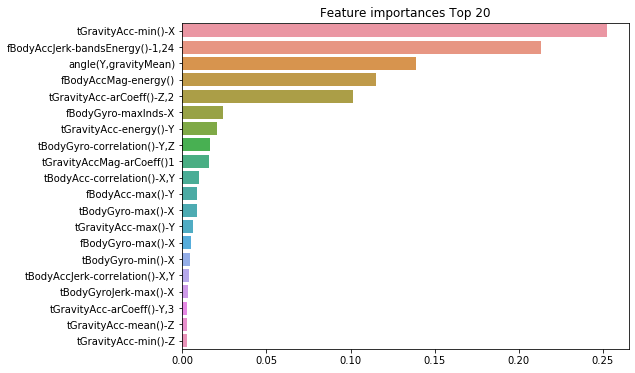

In [27]:
import seaborn as sns

ftr_importances_values = dt_clf_rs.best_estimator_.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

* RandomForest  + hyperparameter tuning + cross validation

In [32]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': np.arange(20,100,10), 'max_depth':np.arange(2,16,2)}

rf_clf = RandomForestClassifier()
rf_clf_rs = RandomizedSearchCV(rf_clf, param_distributions=params,random_state = 42, verbose=2, n_jobs=-1)
rf_clf_rs.fit(X_train, y_train)
y_pred = rf_clf_rs.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.0s finished


In [34]:
print("Best Estimator : ", rf_clf_rs.best_estimator_)
print("Best Parameters : ", rf_clf_rs.best_params_)
print("Best Score : ", rf_clf_rs.best_score_)

Best Estimator :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Parameters :  {'n_estimators': 80, 'max_depth': 14}
Best Score :  0.9193450704551024


In [33]:
accuracy_score(y_test, y_pred)

0.9267051238547676

In [35]:
confusion_matrix(y_test, y_pred)

array([[537,   0,   0,   0,   0,   0],
       [  0, 439,  52,   0,   0,   0],
       [  0,  48, 484,   0,   0,   0],
       [  0,   0,   0, 485,   6,   5],
       [  0,   0,   0,  19, 359,  42],
       [  0,   0,   0,  37,   7, 427]], dtype=int64)

In [36]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

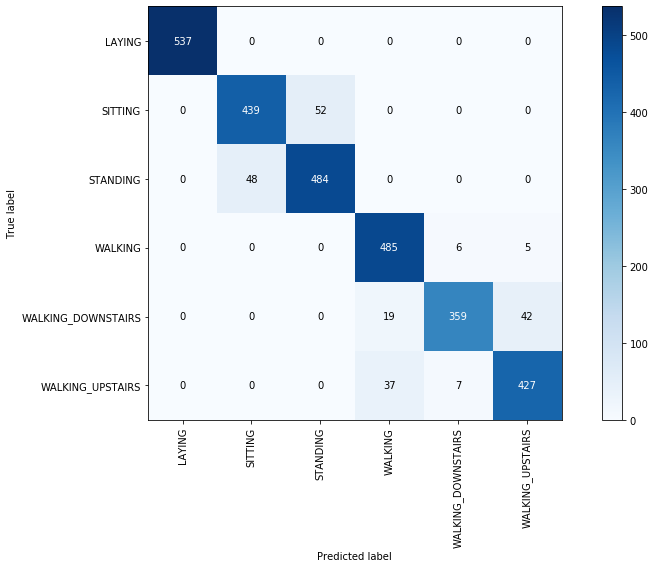

In [37]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  # plotting confusion matrix

* feature importace

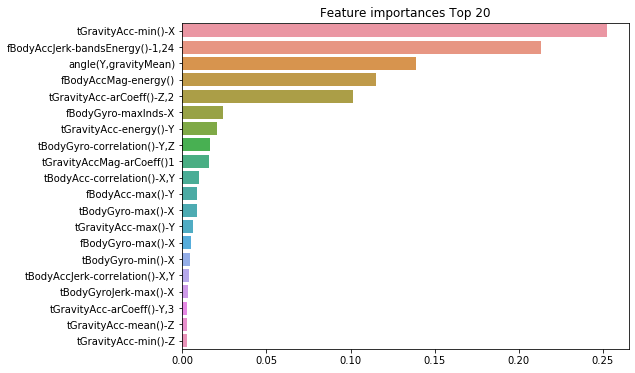

In [27]:
import seaborn as sns

ftr_importances_values = dt_clf_rs.best_estimator_.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()